### TensorFlow 2.0 선택
[런타임] -> [런타임 유형변경]에서 하드웨어 가속기를 꼭 GPU로 설정!

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
## Importing Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
print(keras.__version__)

2.1.0-rc1
2.2.4-tf


# GoogLeNet for Cifar10 Dataset

In [0]:
## Hyperparameters
learning_rate = 0.0001
training_epochs = 20
batch_size = 100
img_size = 224
n_class = 10

In [0]:
## Data 준비

## MNIST Dataset #########################################################
#mnist = keras.datasets.mnist
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
##########################################################################

## Fashion MNIST Dataset #################################################
#mnist = keras.datasets.fashion_mnist
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
##########################################################################

## Cifar10 Dataset #########################################################
cifar = keras.datasets.cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
############################################################################

In [0]:
## data preprocessing - resize image
def img_resize(images, labels):
  return tf.image.resize(images, (img_size, img_size)), labels

In [0]:
## Dataset 만들기
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()    
    
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
#train_images = np.expand_dims(train_images, axis=-1)
#test_images = np.expand_dims(test_images, axis=-1)
print(train_images.shape)
print(test_images.shape)
n_train = train_images.shape[0]
n_test = test_images.shape[0]
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10) 

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=50000).batch(batch_size).map(img_resize).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(
                batch_size).map(img_resize).repeat()

In [0]:
## GoogLeNet
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPool2D, GlobalAveragePooling2D, Concatenate, Dropout

def create_model():
    ## Stem
    inputs = Input(shape=(img_size, img_size, 3))
    net = Conv2D(64, 7, 2, 'SAME', activation='relu')(inputs)
    net = MaxPool2D(3, 2, 'SAME')(net)
    net = Conv2D(64, 1, 1, 'SAME', activation='relu')(net)
    net = Conv2D(192, 3, 1, 'SAME', activation='relu')(net)
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 3a
    b1 = Conv2D(64, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(96, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(16, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(32, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(32, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 3b
    b1 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(192, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(96, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## 
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 4a
    b1 = Conv2D(192, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(96, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(208, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(16, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(48, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4b
    b1 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(112, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(224, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(24, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4c
    b1 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(128, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(256, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(24, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4d
    b1 = Conv2D(112, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(144, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(288, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(64, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(64, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 4e
    b1 = Conv2D(256, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(320, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ##
    net = MaxPool2D(3, 2, 'SAME')(net)
    ## inception 5a
    b1 = Conv2D(256, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(160, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(320, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(32, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## inception 5b
    b1 = Conv2D(384, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(192, 1, 1, 'SAME', activation='relu')(net)
    b2 = Conv2D(384, 3, 1, 'SAME', activation='relu')(b2)
    b3 = Conv2D(48, 1, 1, 'SAME', activation='relu')(net)
    b3 = Conv2D(128, 5, 1, 'SAME', activation='relu')(b3)
    b4 = MaxPool2D(3, 1, 'SAME')(net)
    b4 = Conv2D(128, 1, 1, 'SAME', activation='relu')(b4)
    net = Concatenate()([b1, b2, b3, b4])
    ## global average pooling
    net = GlobalAveragePooling2D()(net)
    net = Dropout(0.4)(net)
    net = Dense(10, activation='softmax')(net)
    
    return keras.Model(inputs=inputs, outputs=net)

In [0]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 56, 56, 64)   4160        max_pooling2d_3[0][0]            
______________________________________________________________________________________________

In [0]:
## Model Compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
steps_per_epoch = n_train/batch_size
validation_steps = n_test/batch_size

model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 9s 86ms/step - loss: 2.3025 - accuracy: 0.1000


[2.3025395321846007, 0.1]

In [0]:
## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch
                    validation_data=test_dataset, validation_steps=validation_steps)

Train for 500.0 steps, validate for 100.0 steps
Epoch 1/20
500/500 [==============================] - 110s 219ms/step - loss: 2.1990 - accuracy: 0.1577 - val_loss: 1.8501 - val_accuracy: 0.3146
Epoch 2/20
500/500 [==============================] - 106s 212ms/step - loss: 1.6416 - accuracy: 0.3879 - val_loss: 1.4056 - val_accuracy: 0.4730
Epoch 3/20
500/500 [==============================] - 106s 212ms/step - loss: 1.2840 - accuracy: 0.5284 - val_loss: 1.1410 - val_accuracy: 0.5858
Epoch 4/20
500/500 [==============================] - 106s 212ms/step - loss: 1.0472 - accuracy: 0.6230 - val_loss: 0.9969 - val_accuracy: 0.6439
Epoch 5/20
500/500 [==============================] - 106s 212ms/step - loss: 0.8909 - accuracy: 0.6821 - val_loss: 0.8486 - val_accuracy: 0.6996
Epoch 6/20
500/500 [==============================] - 106s 212ms/step - loss: 0.7515 - accuracy: 0.7340 - val_loss: 0.8215 - val_accuracy: 0.7051
Epoch 7/20
500/500 [==============================] - 106s 212ms/step - loss

In [0]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

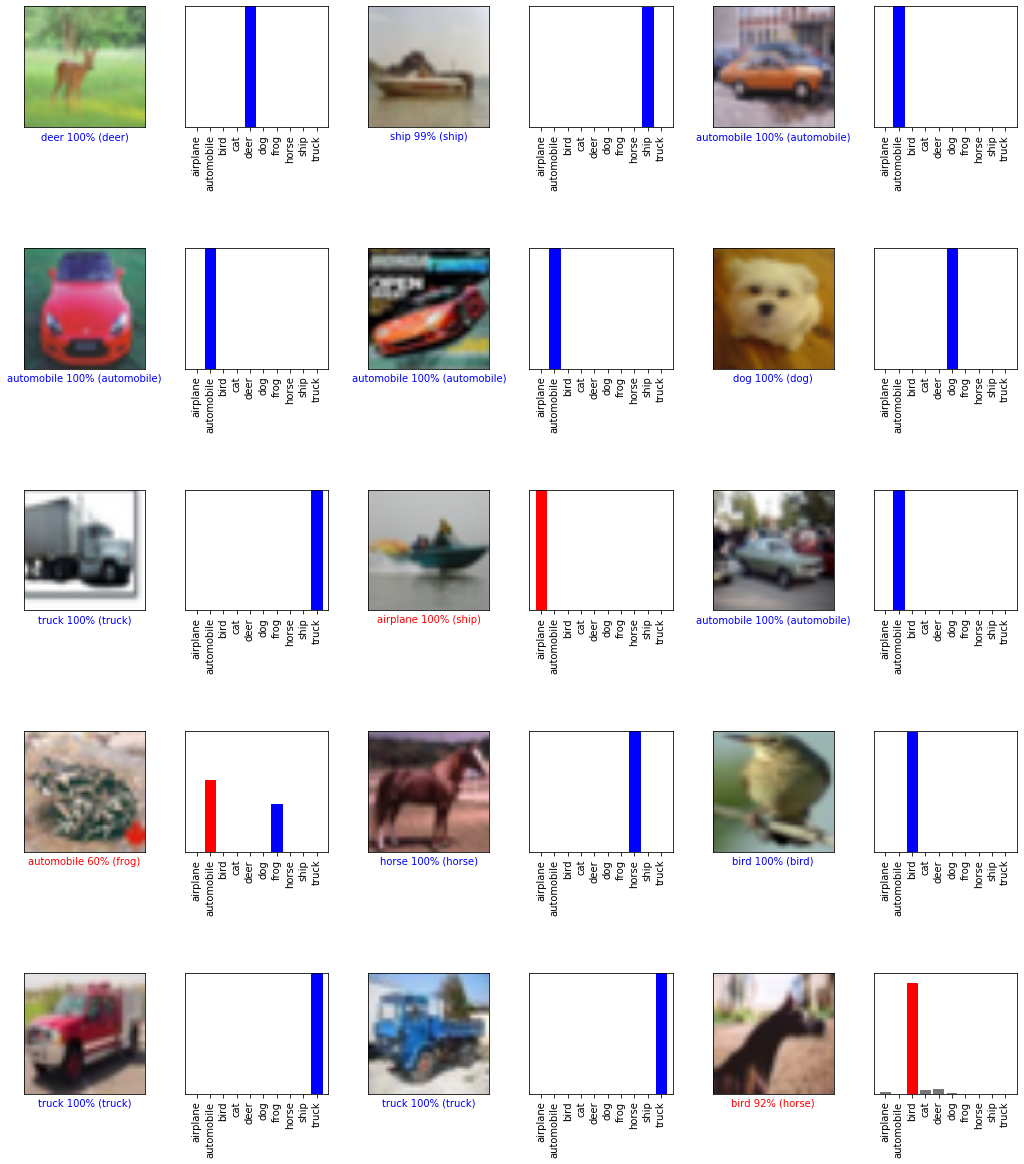

In [0]:
rnd_idx = np.random.randint(1, n_test//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break